## Data Prerpocessing for PHM08 Data Set
In this notebook, we create two types of training datasets for the PHM08 dataset. The first dataset is for a regression or timeseries forecasting model which has `RUL (remining useful lifetime)` column. The second dataset is for a classification model which has `FLAG` column which indicates "1" as a failure and "0" as a non-failure.

In [1]:
# load data from raw data
import pandas as pd
import numpy as np
names = ["unit", "time", "settings1", "settings2", "settings3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21", "dummy1", "dummy2"]
df = pd.read_csv("../data/raw/PHM08/train.txt", delimiter=" ",header=None,names=names,index_col=None)
df.head(10)

,unit,time,settings1,settings2,settings3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,dummy1,dummy2
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,NaN,NaN
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,NaN,NaN
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,NaN,NaN
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,NaN,NaN
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,NaN,NaN
5,1,6,20.0032,0.7017,0.0,491.19,607.37,1480.46,1258.90,9.35,...,8053.17,9.2276,0.02,364,2324,100.0,24.44,14.7019,NaN,NaN
6,1,7,41.9998,0.8400,40.0,445.00,549.57,1354.43,1131.44,3.91,...,8082.01,9.3753,0.02,331,2212,100.0,10.53,6.4254,NaN,NaN
7,1,8,0.0011,0.0000,100.0,518.67,642.08,1589.55,1407.59,14.62,...,8133.29,8.4339,0.03,391,2388,100.0,38.98,23.2337,NaN,NaN
8,1,9,0.0011,0.0020,100.0,518.67,642.70,1586.18,1399.01,14.62,...,8132.72,8.3922,0.03,392,2388,100.0,38.99,23.2412,NaN,NaN
9,1,10,42.0066,0.8400,40.0,445.00,549.83,1353.19,1125.09,3.91,...,8085.94,9.3667,0.02,330,2212,100.0,10.75,6.4268,NaN,NaN


In [2]:
# delete unnecessary columns
df = df.drop(["dummy1", "dummy2"], axis="columns")
print(df.columns)

Index(['unit', 'time', 'settings1', 'settings2', 'settings3', 'sensor1',
       'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7',
       'sensor8', 'sensor9', 'sensor10', 'sensor11', 'sensor12', 'sensor13',
       'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19',
       'sensor20', 'sensor21'],
      dtype='object')


In [3]:
# check types of columns
df["unit"] = df["unit"].astype(str)
print(df.dtypes)

unit          object
time           int64
settings1    float64
settings2    float64
settings3    float64
sensor1      float64
sensor2      float64
sensor3      float64
sensor4      float64
sensor5      float64
sensor6      float64
sensor7      float64
sensor8      float64
sensor9      float64
sensor10     float64
sensor11     float64
sensor12     float64
sensor13     float64
sensor14     float64
sensor15     float64
sensor16     float64
sensor17       int64
sensor18       int64
sensor19     float64
sensor20     float64
sensor21     float64
dtype: object


In [4]:
# total # of unit number 
unit_list = df["unit"].unique()
total_unit = len(unit_list)
print("# of total unit:", total_unit)

# of total unit: 218


In [5]:
# explore data of UnitNum==1
df[df["unit"] == "1"]

,unit,time,settings1,settings2,settings3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,1,219,35.0073,0.8400,60.0,449.44,556.39,1381.50,1149.74,5.48,...,182.52,2388.11,8068.10,9.4265,0.02,337,2223,100.0,14.82,8.7966
219,1,220,35.0027,0.8400,60.0,449.44,556.65,1375.43,1149.45,5.48,...,182.73,2388.15,8068.06,9.4148,0.02,338,2223,100.0,14.75,8.8290
220,1,221,0.0008,0.0000,100.0,518.67,643.88,1593.26,1425.82,14.62,...,520.04,2388.28,8139.03,8.5363,0.03,394,2388,100.0,38.67,23.0218
221,1,222,20.0003,0.7001,0.0,491.19,608.00,1494.99,1270.18,9.35,...,313.64,2388.37,8065.53,9.2846,0.03,369,2324,100.0,24.28,14.5645


In [6]:
# explore lifetime for each unit
life = []
for x in range(total_unit):
    filtered = df[df["unit"] == str(x+1)]
    life.append(filtered["time"].max())
print(life)

[223, 164, 150, 159, 357, 225, 168, 276, 181, 228, 210, 242, 210, 147, 178, 172, 228, 196, 167, 154, 205, 203, 213, 191, 281, 210, 178, 278, 228, 200, 283, 193, 286, 286, 188, 147, 177, 287, 161, 187, 201, 241, 209, 233, 242, 277, 227, 227, 285, 223, 182, 212, 259, 249, 147, 162, 150, 147, 169, 300, 229, 238, 254, 154, 209, 190, 145, 204, 170, 175, 225, 235, 249, 192, 186, 128, 174, 228, 225, 284, 199, 223, 231, 206, 246, 205, 177, 134, 225, 190, 199, 207, 222, 209, 234, 339, 157, 206, 263, 213, 226, 222, 243, 178, 149, 189, 200, 230, 160, 277, 227, 226, 160, 197, 260, 232, 212, 188, 242, 170, 153, 237, 254, 197, 245, 241, 163, 159, 147, 143, 263, 199, 151, 173, 188, 232, 237, 181, 211, 210, 277, 215, 149, 272, 189, 231, 323, 264, 192, 175, 317, 213, 277, 171, 221, 228, 202, 167, 174, 147, 184, 202, 177, 211, 160, 229, 177, 253, 218, 302, 258, 222, 190, 178, 278, 197, 218, 255, 223, 200, 161, 220, 225, 160, 198, 236, 199, 246, 242, 152, 255, 176, 223, 246, 284, 226, 157, 137, 192, 182,

(array([ 5., 13., 18., 11., 19., 17., 23., 18., 32., 17.,  9., 11.,  2.,
        17.,  0.,  2.,  1.,  1.,  1.,  1.]),
 array([128.  , 139.45, 150.9 , 162.35, 173.8 , 185.25, 196.7 , 208.15,
        219.6 , 231.05, 242.5 , 253.95, 265.4 , 276.85, 288.3 , 299.75,
        311.2 , 322.65, 334.1 , 345.55, 357.  ]),
 <BarContainer object of 20 artists>)

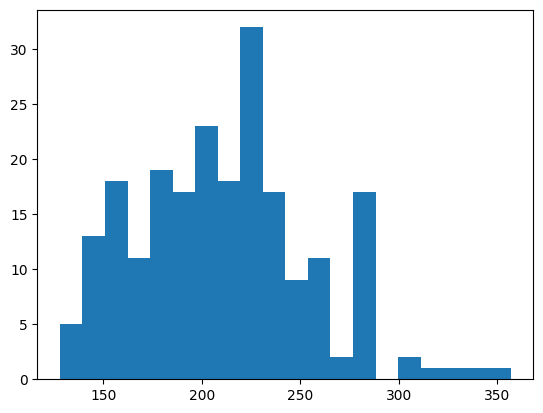

In [7]:
# visualize lifetime by histogram
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(life, bins=20)

In [8]:
# create RUL (remaining useful lifetime) column
for unit in range(total_unit+1):
    df.loc[df["unit"] == str(unit), "RUL"] = df[df["unit"] == str(unit)]["time"].max() - df[df["unit"] == str(unit)]["time"]
df.tail()

,unit,time,settings1,settings2,settings3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,2387.39,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4.0
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,2387.28,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3.0
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,2387.33,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2.0
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,2387.56,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1.0
45917,218,133,25.0071,0.6216,80.0,462.54,537.46,1274.65,1068.77,7.05,...,2027.75,7859.24,10.9748,0.02,310,1915,84.93,14.19,8.5120,0.0


In [9]:
# "1" for the last 30 cycles before failure (RUL = 0), "0" otherwise.
df.loc[df["RUL"] <= 60, "FLAG"] = "1"
df.loc[df["RUL"] > 60, "FLAG"] = "0"

In [10]:
df.head()

,unit,time,settings1,settings2,settings3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,FLAG
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222.0,0
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221.0,0
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220.0,0
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219.0,0
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218.0,0


In [11]:
df.tail()

,unit,time,settings1,settings2,settings3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,FLAG
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,4.0,1
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,3.0,1
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,2.0,1
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,1.0,1
45917,218,133,25.0071,0.6216,80.0,462.54,537.46,1274.65,1068.77,7.05,...,7859.24,10.9748,0.02,310,1915,84.93,14.19,8.5120,0.0,1


In [12]:
df.to_csv("../data/processed/data.csv", index=None)